# Sources Parameter Plots
#The purpose of this notebook is to plot different parameters of our ~30 target protoplanetary disks and their stars in order to confirm trends and looks for gaps in the paraemter space that could inform new areas of study.

In [221]:
from astropy.io import fits
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

In [222]:
# Read in sources info sheet csv
data = pd.read_csv (r"C:\Users\pheretz\Desktop\URSI_Internship\Sources Info Sheet - Catalog 6.16.csv")

# 1. Star mass vs. Disk mass

In [223]:
# 1. Star mass vs. Disk mass


# Note, star mass is logged, while disk mass is not. Both are in solar mass units

# Conclusion: Disk mass is a difficult value to find, and its value varies depending on model used. 
# Stars with stellar mass between -0.7 and -0.4 (logM*) are not present and could be an area of future study. 


In [224]:
# define columns
df = pd.DataFrame(data, columns= ['Star','Log_Mstar','uncertainty_positive_Log_Mstar','uncertainty_negative_Log_Mstar','Mdisk'])
# suppress rows with -99 values
df_loc = df.loc[df['Mdisk'] != -99]
# show table, print (df_loc)

# send values to plot
star_list = df_loc['Star'].tolist()
Mstar = df_loc['Log_Mstar'].tolist()
Mdisk = df_loc['Mdisk'].tolist()
M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


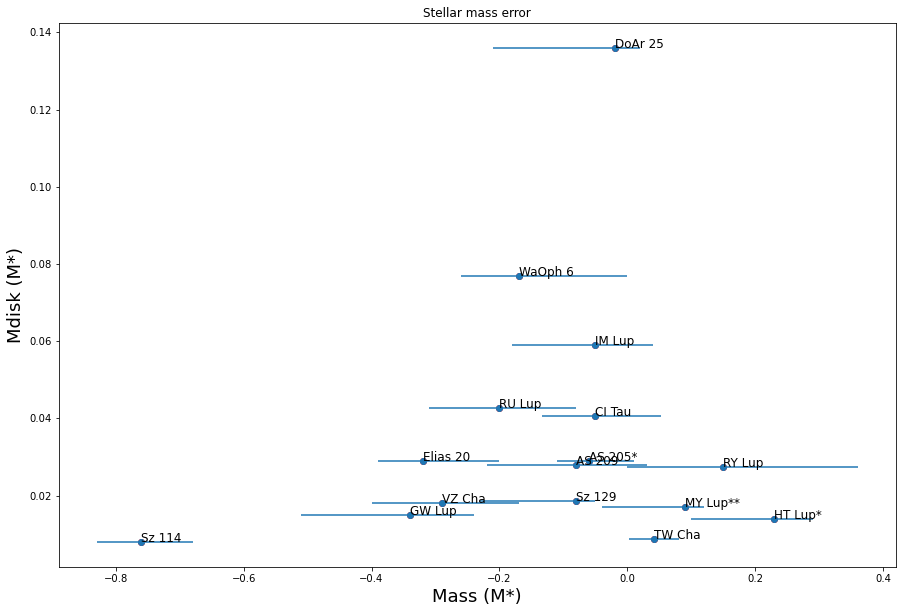

In [225]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mstar, Mdisk, 'ro')
for i, (x, y) in enumerate(zip(Mstar, Mdisk)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Mass (M*)',fontsize=18)
ax1.set_ylabel('Mdisk (M*)',fontsize=18)

# error plot
Mstar_error = [M_neg_unc, M_pos_unc]
x = Mstar
y = Mdisk
ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

# 2. Spectral Type vs. Age

In [226]:
# 2. Spectral Type vs. Age

# define columns
df_spec = pd.DataFrame(data, columns= ['Star','Spectral_Type','log_tstar'])

# print(df_spec)

# Add a column to dataframe of spectral type as digits  # NOTE, currently pulling integer, not float, missing dec place
f = lambda s: s[0:2]
df_spec['SpType2'] = df_spec['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
f = lambda s: order[s[0]]+s[1]
df_spec['SpType2'] = df_spec['SpType2'].apply(f)
# sort list by spectral type "digits"
df_spec2 = df_spec.sort_values('SpType2', ascending = True).reset_index(drop=True)

# print(df_spec2)

# send values to plot
star_list = df_spec2['Star'].tolist()
spectral_type2 = df_spec2['SpType2'].tolist()
star_age = df_spec2['log_tstar'].tolist()


# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


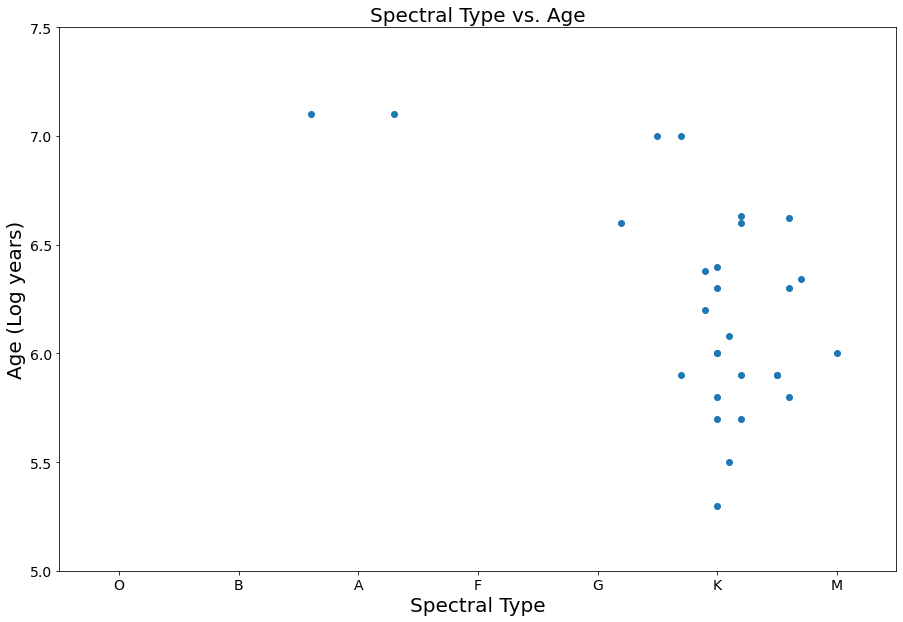

In [227]:
# x y plot

#fig=plt.figure(1,figsize=(18,10))
#ax1=fig.add_subplot(111)
#ax1.plot(spectral_type2, star_age, 'ro')
#for i, (x, y) in enumerate(zip(spectral_type2, star_age)):
    #ax1.text(x,y,star_list[i],fontsize=12)
#ax1.set_xlabel('Spectral Type',fontsize=18)
#ax1.set_ylabel('Age',fontsize=18)

# set ticks to OBAFGKM from digits
#ax1.set_xticks(np.arange(0, 60, step=10))
#ax1.set_xticks([0,10.,20.,30.,40.,50.,60.]) #,['O','B','A','F','G','K','M'])
#ax1.set_xticks(range(5,75,10))
#ax1.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])

fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(5, 7.5)
#ax.grid()
ax.set_title('Spectral Type vs. Age')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Age (Log years)')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_spec2['SpType2'].astype(int), df_spec2['log_tstar'])
           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)
#for i, (x, y) in enumerate(zip(spectral_type2, star_age)):
    #ax.text(x,y,star_list[i],fontsize=12)


plt.show()

Next steps:
- Add Star names 
- Add year error bars (confirm error prop conversion is correct first)

Conclusion:
- Good representation of range of ages (typical protstar phase is 100,000 (10^5) - 10,000,000 (10^7) years)
- Why are the oldest stars hotter? They should be farther along evolutionarily 
- Future areas of study:
    - O,B,F,G stars
    - Younger A,B stars



# 3. Spectral Type vs. Disk Mass

In [228]:
# 3. Spectral Type vs. Disk Mass

# define columns
df_specdisk = pd.DataFrame(data, columns= ['Star','Spectral_Type','Mdisk'])
#print(df_specdisk)
# suppress rows with -99 values
df_specdiskclean = df_specdisk.loc[df_specdisk['Mdisk'] != -99]

#print(df_specdiskclean)

# Add a column to dataframe of spectral type as digits  # NOTE, currently pulling integer, not float, missing dec place
f = lambda s: s[0:2]
df_specdiskclean['SpType2'] = df_specdiskclean['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
f = lambda s: order[s[0]]+s[1]
df_specdiskclean['SpType2'] = df_specdiskclean['SpType2'].apply(f)
# sort list by spectral type "digits"
df_specdiskclean2 = df_specdiskclean.sort_values('SpType2', ascending = True).reset_index(drop=True)

# print(df_spec2)

# send values to plot
star_list = df_specdiskclean2['Star'].tolist()
spectral_type2 = df_specdiskclean2['SpType2'].tolist()
disk_mass = df_specdiskclean2['Mdisk'].tolist()


# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


C:\Users\pheretz\AppData\Local\Temp\ipykernel_10648\1584025836.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specdiskclean['SpType2'] = df_specdiskclean['Spectral_Type'].apply(f)
C:\Users\pheretz\AppData\Local\Temp\ipykernel_10648\1584025836.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specdiskclean['SpType2'] = df_specdiskclean['SpType2'].apply(f)


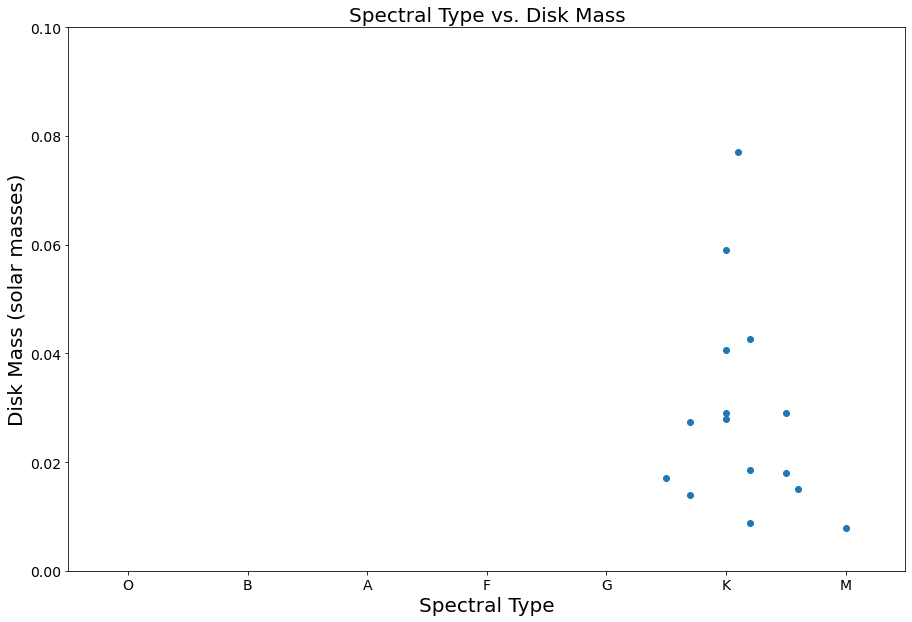

In [229]:
fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(0, 0.1)
#ax.grid()
ax.set_title('Spectral Type vs. Disk Mass')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Disk Mass (solar masses)')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_specdiskclean2['SpType2'].astype(int), df_specdiskclean2['Mdisk'])
           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)
#for i, (x, y) in enumerate(zip(spectral_type2, star_age)):
    #ax.text(x,y,star_list[i],fontsize=12)


plt.show()

Conclusion: 
- Disk masses clustered around 0.02 solar masses, G-M type stars
- Study heavier disk masses, 0.04 solar masses and greater, G-M type stars
- Study the disk masses of other spectral types, O-G

Next steps:
- Search for missing datapoints in the literature
- Add error bars (many are missing)

# 4. Spectral Type vs. Dust Radius

In [230]:
# 4. Spectral Type vs. Disk Radius

# define columns
df_specrad = pd.DataFrame(data, columns= ['Star','Spectral_Type','Rdust','uncertainty_Rdust_positive','uncertainty_Rdust_negative'])
#print(df_specdisk)
# suppress rows with -99 values
df_specradclean = df_specrad.loc[df_specrad['Rdust'] != -99]

#print(df_specradclean)

# Add a column to dataframe of spectral type as digits  # NOTE, currently pulling integer, not float, missing dec place
f = lambda s: s[0:2]
df_specradclean['SpType2'] = df_specradclean['Spectral_Type'].apply(f)
# Define digits order, OBAFGKM
order = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
# Add spectral digit value 
f = lambda s: order[s[0]]+s[1]
df_specradclean['SpType2'] = df_specradclean['SpType2'].apply(f)
# sort list by spectral type "digits"
df_specradclean2 = df_specradclean.sort_values('SpType2', ascending = True).reset_index(drop=True)

# print(df_spec2)

# send values to plot
star_list = df_specradclean2['Star'].tolist()
spectral_type2 = df_specradclean2['SpType2'].tolist()
disk_radius = df_specradclean2['Rdust'].tolist()


# Guidance from: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html


C:\Users\pheretz\AppData\Local\Temp\ipykernel_10648\1773167248.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specradclean['SpType2'] = df_specradclean['Spectral_Type'].apply(f)
C:\Users\pheretz\AppData\Local\Temp\ipykernel_10648\1773167248.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specradclean['SpType2'] = df_specradclean['SpType2'].apply(f)


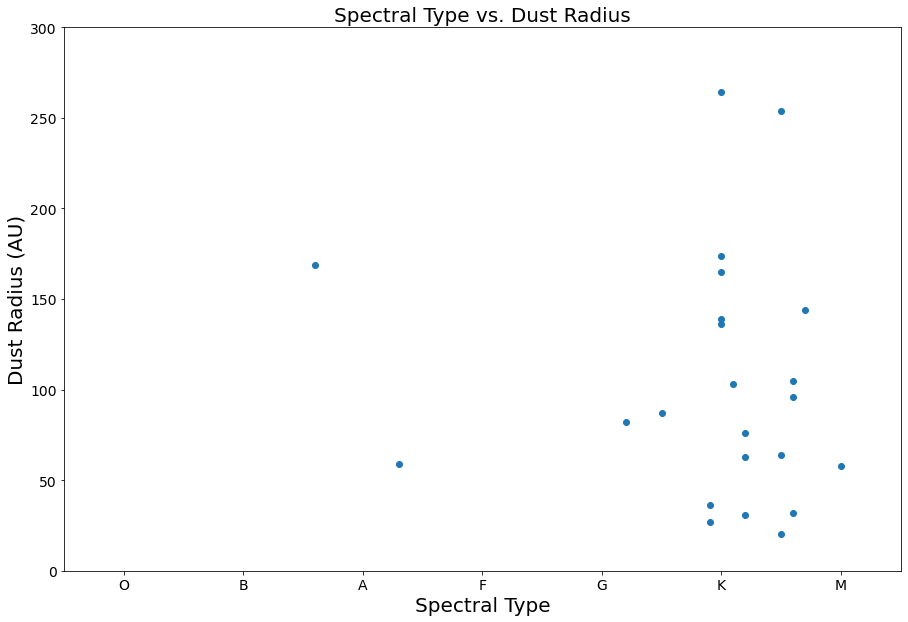

In [231]:
fig, ax = plt.subplots(figsize=(15,10)) 

ax.set_xlim(0, 70)
ax.set_ylim(0, 300)
#ax.grid()
ax.set_title('Spectral Type vs. Dust Radius')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Type')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Dust Radius (AU)')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_specradclean2['SpType2'].astype(int), df_specradclean2['Rdust'])
           
ax.set_xticks(range(5,75,10)) # range(min,max,step count)
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)
#for i, (x, y) in enumerate(zip(spectral_type2, star_age)):
    #ax.text(x,y,star_list[i],fontsize=12)


plt.show()

Conclusion:
- Range of dust radii well represented for K type stars
- Dust radius data for other spectral types needed

# 5. Disk Mass vs. Dust Radius

In [232]:
# define columns
df_massrad = pd.DataFrame(data, columns= ['Star','Mdisk','Rdust'])
# suppress rows with -99 values
df_massradclean = df_massrad.loc[df_massrad['Mdisk'] != -99]
# show table, 
#print (df_massradclean)
df_massradclean2 = df_massradclean.loc[df_massradclean['Rdust'] != -99]
#print(df_massradclean2)

# send values to plot
star_list = df_massradclean2['Star'].tolist()
Rdust = df_massradclean2['Rdust'].tolist()
Mdisk = df_massradclean2['Mdisk'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


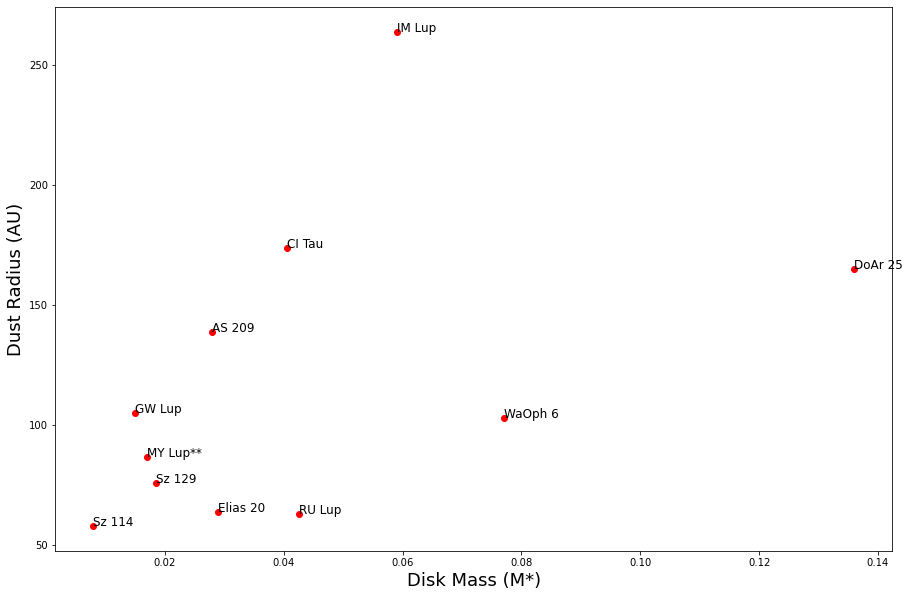

In [233]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mdisk, Rdust, 'ro')
for i, (x, y) in enumerate(zip(Mdisk, Rdust)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Mass (M*)',fontsize=18)
ax1.set_ylabel('Dust Radius (AU)',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

Conclusion:
- Visual notes:
    - Expected correlation between low disk mass and smaller radius
    - But as disk mass grows, two "branches" occur, one where radius grows substantially with mass, the other where it grows slowly with disk mass

# 4.  Disk Inclination vs. Extinction

In [234]:
# define columns
df_avinc = pd.DataFrame(data, columns= ['Star','disk_inclination','uncertainty_disk_inclination_positive','uncertainty_disk_inclination_negative',
                                  'A_v'])
# suppress rows with -99 values
df_avincclean = df_avinc.loc[df_avinc['disk_inclination'] != -99]
# show table, 
#print (df_avincclean)
df_avincclean2 = df_avincclean.loc[df_avincclean['A_v']!= -99]
#print (df_avincclean2)

# send values to plot
star_list = df_avincclean2['Star'].tolist()
disk_inclination = df_avincclean2['disk_inclination'].tolist()
I_pos_unc = df_avincclean2['uncertainty_disk_inclination_positive'].tolist()
I_neg_unc = df_avincclean2['uncertainty_disk_inclination_negative'].tolist()
A_v = df_avincclean2['A_v'].tolist()


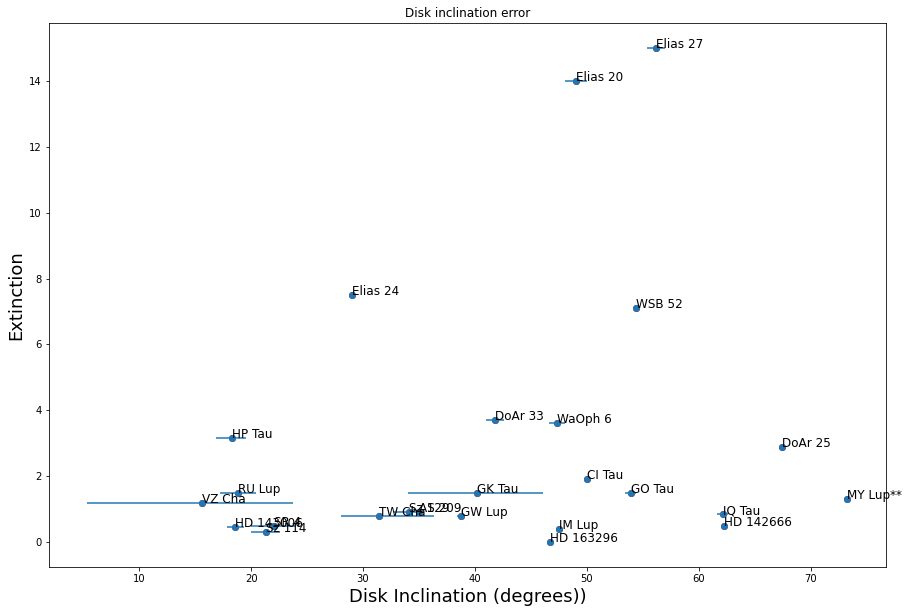

In [235]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(disk_inclination, A_v, 'ro')
for i, (x, y) in enumerate(zip(disk_inclination, A_v)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Inclination (degrees))',fontsize=18)
ax1.set_ylabel('Extinction',fontsize=18)

# error plot
Inclination_error = [I_neg_unc, I_pos_unc]
x = disk_inclination
y = A_v
ax1.errorbar(x, y, xerr=Inclination_error, fmt='o')
ax1.set_title('Disk inclination error')

plt.show()


Conclusion:
- Experimenting with the idea that disk inclination from Earth could impact extinction, just an experiement! Not sure what to draw from this.

# 7. Age vs. Number of Gaps

In [236]:
# 7. Age vs. Number of Gaps 

# define columns
df_agegaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','log_tstar'])
# suppress rows with -99 values
df_agegapsclean = df_agegaps.loc[df_agegaps['dark_gap_number'] != -99]

# print(df_spec)

# print(df_spec2)

# send values to plot
star_list = df_agegapsclean['Star'].tolist()
dark_gap_number = df_agegapsclean['dark_gap_number'].tolist()
star_age = df_agegapsclean['log_tstar'].tolist()


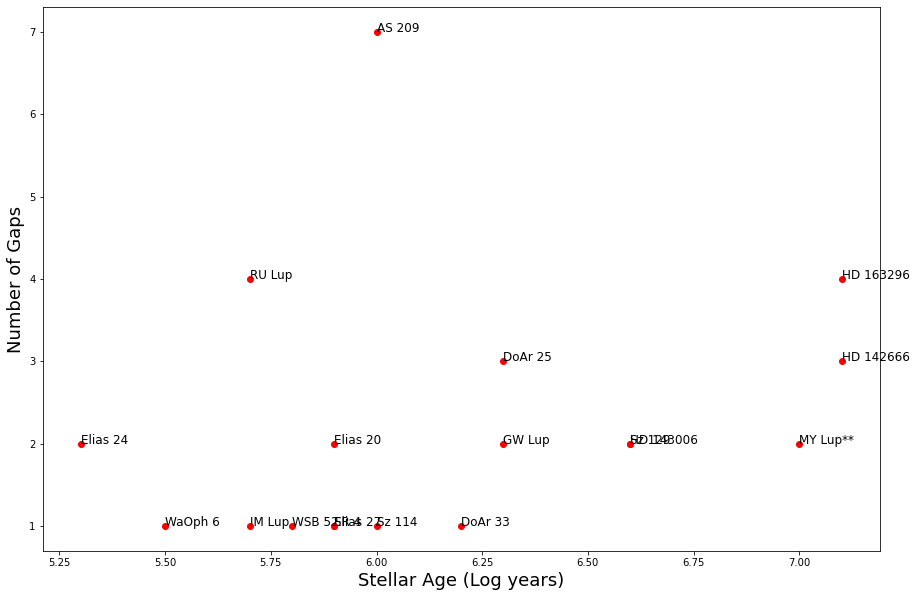

In [237]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(star_age, dark_gap_number, 'ro')
for i, (x, y) in enumerate(zip(star_age, dark_gap_number)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Stellar Age (Log years)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# NEXT: Confirm log error prop
# error plot
#Inclination_error = [I_neg_unc, I_pos_unc]
#x = disk_inclination
#y = A_v
#ax1.errorbar(x, y, xerr=Inclination_error, fmt='o')
#ax1.set_title('Disk inclination error')

plt.show()


Conclusion:
- Visually, there appears to be a trend between the number of dark gaps and the age of the star, indicating that gaps appear over time, likely as planets form.
- There are interesting outliers, particularly Elias 24, RU Lup, and AS 209, where gaps have formed at a younger age.
Next:
- Add age uncertainty
- Explore Elias 24, RU Lup, AS 209 commonalities, potential area of study

# 8. Distance vs. Number of Gaps

In [238]:
# 8. Distance vs. Number of Gaps 

# define columns
df_distgaps = pd.DataFrame(data, columns= ['Star','dark_gap_number','Distance','Uncertainty_distance_positive','Uncertainty_distance_negative'])
# suppress rows with -99 values
df_distgapsclean = df_distgaps.loc[df_distgaps['dark_gap_number'] != -99]

# print(df_spec)

# print(df_spec2)

# send values to plot
star_list = df_distgapsclean['Star'].tolist()
dark_gap_number = df_distgapsclean['dark_gap_number'].tolist()
Distance = df_distgapsclean['Distance'].tolist()
dist_pos_unc = df_distgapsclean['Uncertainty_distance_positive'].tolist()
dist_neg_unc = df_distgapsclean['Uncertainty_distance_negative'].tolist()


C:\Users\pheretz\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\pheretz\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


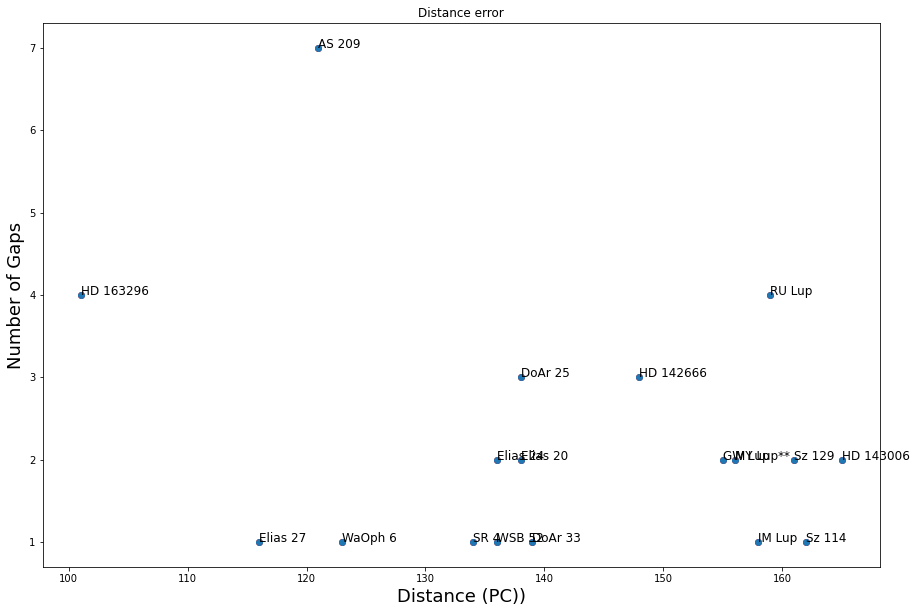

In [239]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Distance, dark_gap_number, 'ro')
for i, (x, y) in enumerate(zip(Distance, dark_gap_number)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Distance (PC))',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
Distance_error = [dist_neg_unc, dist_pos_unc]
x = Distance
y = dark_gap_number
ax1.errorbar(x, y, xerr=Distance_error, fmt='o')
ax1.set_title('Distance error')

plt.show()


Conclusion:
- Experimenting with the idea that further disks may not be resolved as well as closer disks. Not sure if there are any conclusions here! Resolution has other factors as well. 
- Visually, it's interensting that the highest gaps come from the closest disks, HD 163296, AS 209

# 9. Temperature vs. Number of Gaps 

In [240]:
# define columns
df_tempgaps = pd.DataFrame(data, columns= ['Star','T_eff','dark_gap_number'])
# suppress rows with -99 values
df_tempgapsclean = df_tempgaps.loc[df_tempgaps['dark_gap_number'] != -99]
# show table, 
#print (df_tempgapsclean)
#df_diskmassgapclean2 = df_diskmassgapclean.loc[df_diskmassgapclean['dark_gap_number'] != -99]
#print(df_diskmassgapclean2)

# send values to plot
star_list = df_tempgapsclean['Star'].tolist()
dark_gaps = df_tempgapsclean['dark_gap_number'].tolist()
Temp = df_tempgapsclean['T_eff'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


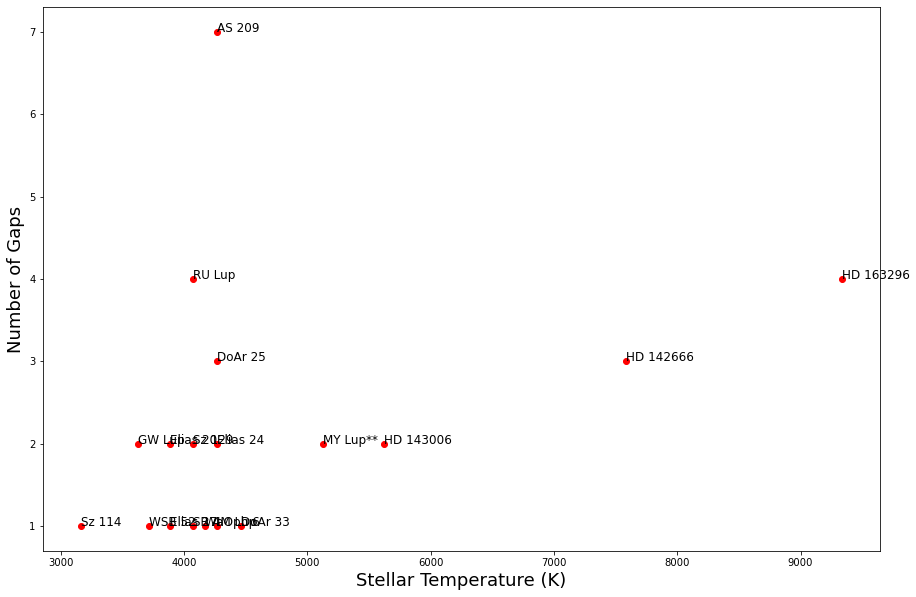

In [241]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Temp, dark_gaps, 'ro')
for i, (x, y) in enumerate(zip(Temp, dark_gaps)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Stellar Temperature (K)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

Conclusion:
- Similar to spectral type, stars of higher temperatures (5000k +) are not well-represented in the sample
- Disks with a high number of gaps (>4) are not well-represented in the sample, though this could be a telescope resolution issue

# 10. Disk Mass vs. Number of Gaps

In [242]:
# define columns
df_diskmassgap = pd.DataFrame(data, columns= ['Star','Mdisk','dark_gap_number'])
# suppress rows with -99 values
df_diskmassgapclean = df_diskmassgap.loc[df_diskmassgap['Mdisk'] != -99]
# show table, 
#print (df_diskmassgapclean)
df_diskmassgapclean2 = df_diskmassgapclean.loc[df_diskmassgapclean['dark_gap_number'] != -99]
print(df_diskmassgapclean2)

# send values to plot
star_list = df_diskmassgapclean2['Star'].tolist()
dark_gaps = df_diskmassgapclean2['dark_gap_number'].tolist()
Mdisk = df_diskmassgapclean2['Mdisk'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


        Star     Mdisk  dark_gap_number
1     GW Lup  0.015015                2
2     IM Lup  0.059063                1
3     RU Lup  0.042619                4
4     Sz 114  0.007961                1
5     Sz 129  0.018565                2
6   MY Lup**  0.016997                2
11  Elias 20  0.029000                2
12   DoAr 25  0.136000                3
17   WaOph 6  0.077000                1
18    AS 209  0.028000                7


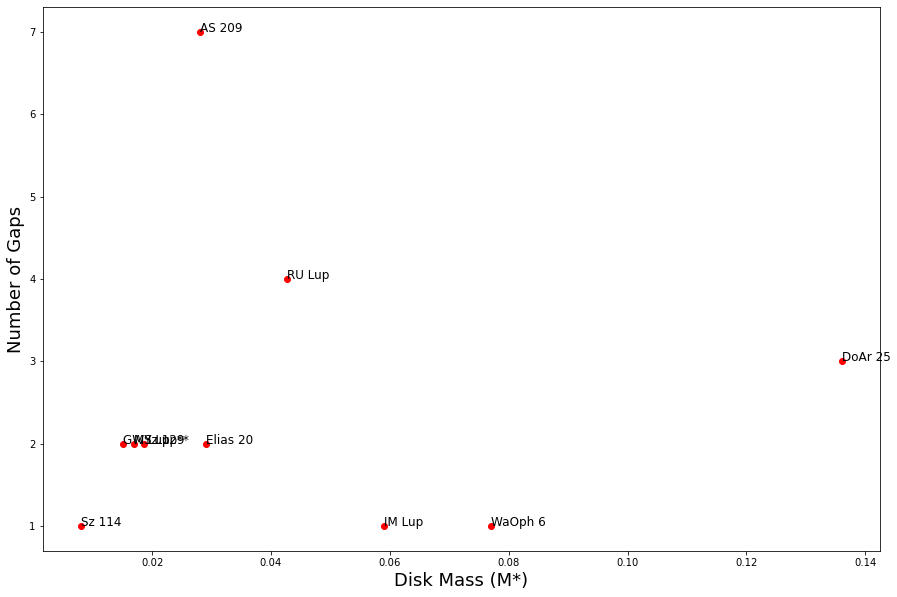

In [243]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mdisk, dark_gaps, 'ro')
for i, (x, y) in enumerate(zip(Mdisk, dark_gaps)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Mass (M*)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

Conclusion:
- Visually, it does not look like we have enough data to determine trends between disk mass and the number of gaps, though there is a broad trend that as disk mass grows, the number of gaps grows
- AS 209 is another interesting outlier 

# 11. Dust Radius vs. Number of Gaps 

In [244]:
# define columns
df_radgaps = pd.DataFrame(data, columns= ['Star','Rdust','dark_gap_number'])
# suppress rows with -99 values
df_radgapsclean = df_radgaps.loc[df_radgaps['Rdust'] != -99]
# show table, 
#print (df_radgapsclean)
df_radgapsclean2 = df_radgapsclean.loc[df_radgapsclean['dark_gap_number'] != -99]
#print(df_radgapsclean2)

# send values to plot
star_list = df_radgapsclean2['Star'].tolist()
dark_gaps = df_radgapsclean2['dark_gap_number'].tolist()
Rdust = df_radgapsclean2['Rdust'].tolist()
#M_pos_unc = df_loc['uncertainty_positive_Log_Mstar'].tolist()
#M_neg_unc = df_loc['uncertainty_negative_Log_Mstar'].tolist()


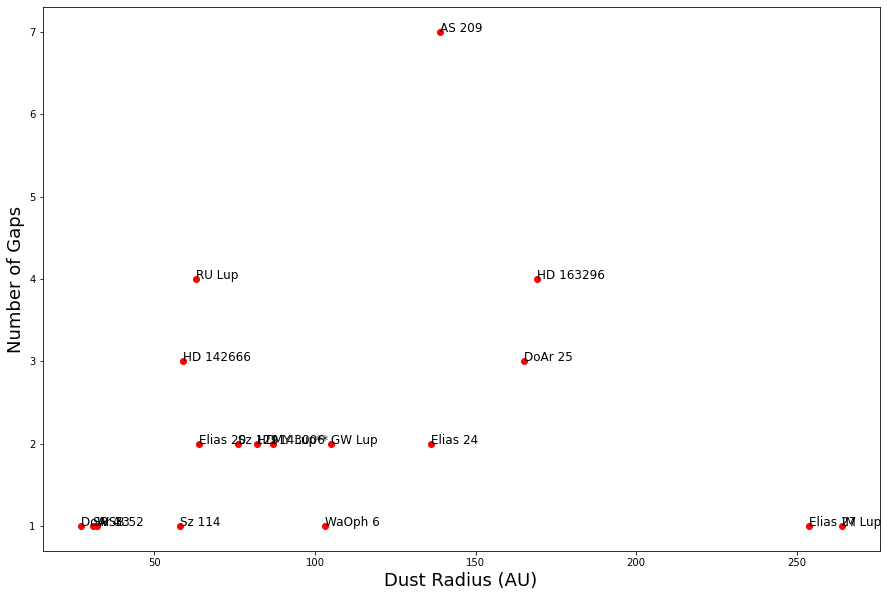

In [245]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Rdust, dark_gaps, 'ro')
for i, (x, y) in enumerate(zip(Rdust, dark_gaps)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Dust Radius (AU)',fontsize=18)
ax1.set_ylabel('Number of Gaps',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()


# IN PROGRESS Age Vs. Extinction

In [246]:
# define columns
df_ageav = pd.DataFrame(data, columns= ['Star','log_tstar','A_v'])
print(df_ageav)
# suppress rows with -99 values
#df_ageavclean = df_ageav.loc[df_ageav['disk_inclination'] != -99]
# show table, 
#print (df_avincclean)
#df_avincclean2 = df_avincclean.loc[df_avincclean['A_v']!= -99]
#print (df_avincclean2)

# send values to plot
#star_list = df_avincclean2['Star'].tolist()
#disk_inclination = df_avincclean2['disk_inclination'].tolist()
#I_pos_unc = df_avincclean2['uncertainty_disk_inclination_positive'].tolist()
#I_neg_unc = df_avincclean2['uncertainty_disk_inclination_negative'].tolist()
#A_v = df_avincclean2['A_v'].tolist()


          Star  log_tstar    A_v
0      HT Lup*   5.900000   0.00
1       GW Lup   6.300000   0.80
2       IM Lup   5.700000   0.40
3       RU Lup   5.700000   1.50
4       Sz 114   6.000000   0.30
5       Sz 129   6.600000   0.90
6     MY Lup**   7.000000   1.30
7    HD 142666   7.100000   0.50
8    HD 143006   6.600000   0.45
9      AS 205*   5.800000   1.75
10        SR 4   5.900000   0.50
11    Elias 20   5.900000  14.00
12     DoAr 25   6.300000   2.90
13    Elias 24   5.300000   7.50
14    Elias 27   5.900000  15.00
15     DoAr 33   6.200000   3.70
16      WSB 52   5.800000   7.10
17     WaOph 6   5.500000   3.60
18      AS 209   6.000000   0.90
19   HD 163296   7.100000   0.00
20      FZ Tau -99.000000   3.50
21      TW Cha   6.633468   0.80
22      VZ Cha -99.000000   1.20
23      GQ Lup   6.000000   1.60
24  IRAS 04385 -99.000000 -99.00
25      GK Tau   6.079181   1.50
26      CI Tau   6.397940   1.90
27      RY Lup   7.000000   0.40
28      IQ Tau   6.623249   0.85
29      HP

IndexError: list index out of range

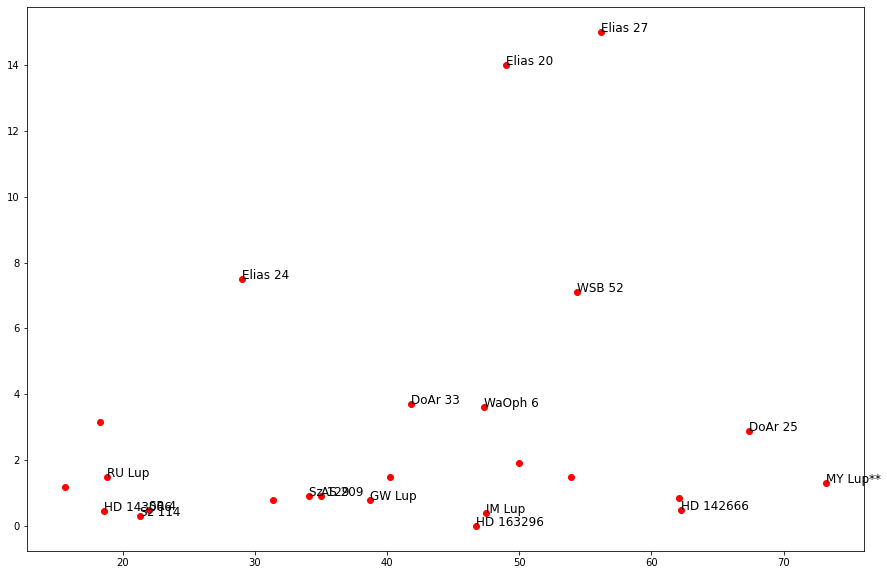

In [247]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(disk_inclination, A_v, 'ro')
for i, (x, y) in enumerate(zip(disk_inclination, A_v)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Disk Inclination (degrees))',fontsize=18)
ax1.set_ylabel('Extinction',fontsize=18)

# error plot
Inclination_error = [I_neg_unc, I_pos_unc]
x = disk_inclination
y = A_v
ax1.errorbar(x, y, xerr=Inclination_error, fmt='o')
ax1.set_title('Disk inclination error')

plt.show()


# 13. Stellar Mass vs. Accretion Rate

In [254]:
# define columns
df_massrate = pd.DataFrame(data, columns= ['Star','Log_Mstar','uncertainty_positive_Log_Mstar','uncertainty_negative_Log_Mstar','log_accretion_rate'])
# suppress rows with -99 values
df_massrateclean = df_massrate.loc[df_massrate['log_accretion_rate'] != -99]
#show table, 
#print (df_massrateclean)

# send values to plot
star_list = df_massrateclean['Star'].tolist()
AccRate = df_massrateclean['log_accretion_rate'].tolist()
Mstar = df_massrateclean['Log_Mstar'].tolist()
M_pos_unc = df_massrateclean['uncertainty_positive_Log_Mstar'].tolist()
M_neg_unc = df_massrateclean['uncertainty_negative_Log_Mstar'].tolist()


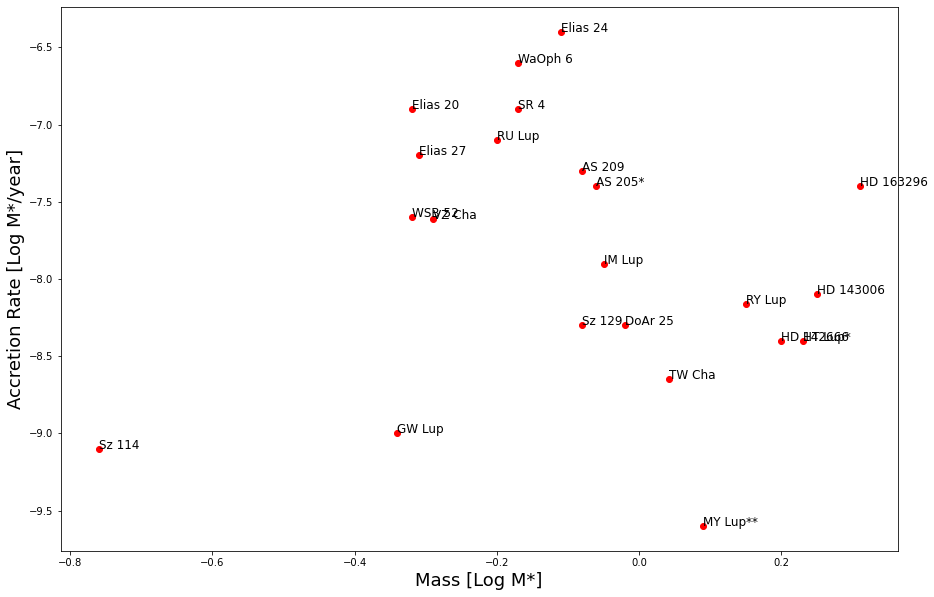

In [255]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mstar, AccRate, 'ro')
for i, (x, y) in enumerate(zip(Mstar, AccRate)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Mass [Log M*]',fontsize=18)
ax1.set_ylabel('Accretion Rate [Log M*/year]',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE

# IN PROGRESS 14. Disk Mass vs. Accretion Rate

In [254]:
# define columns
df_diskmassrate = pd.DataFrame(data, columns= ['Star','Log_Mstar','uncertainty_positive_Log_Mstar','uncertainty_negative_Log_Mstar','log_accretion_rate'])
# suppress rows with -99 values
df_massrateclean = df_massrate.loc[df_massrate['log_accretion_rate'] != -99]
#show table, 
#print (df_massrateclean)

# send values to plot
star_list = df_massrateclean['Star'].tolist()
AccRate = df_massrateclean['log_accretion_rate'].tolist()
Mstar = df_massrateclean['Log_Mstar'].tolist()
M_pos_unc = df_massrateclean['uncertainty_positive_Log_Mstar'].tolist()
M_neg_unc = df_massrateclean['uncertainty_negative_Log_Mstar'].tolist()


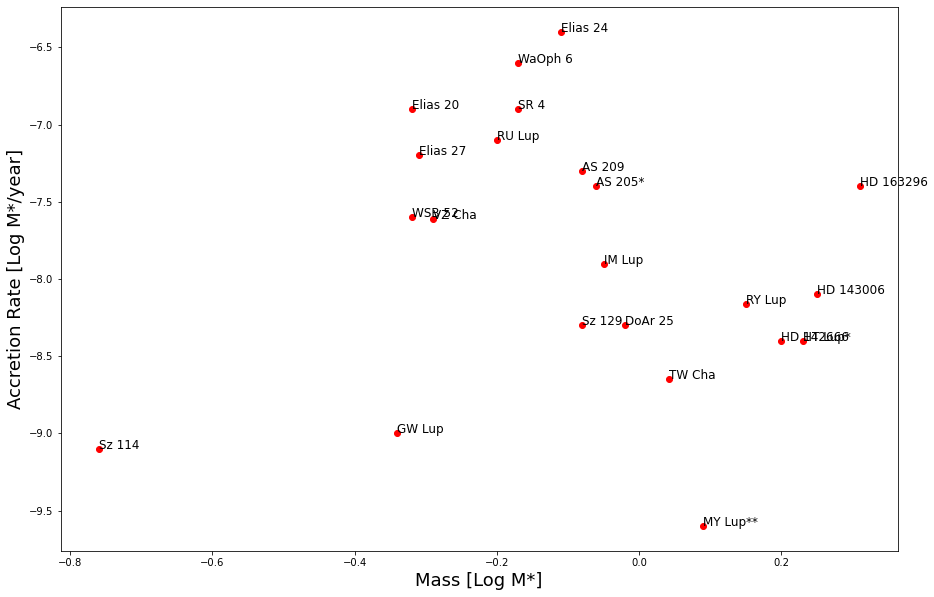

In [255]:
# x y plot
fig=plt.figure(1,figsize=(15,10))
ax1=fig.add_subplot(111)
ax1.plot(Mstar, AccRate, 'ro')
for i, (x, y) in enumerate(zip(Mstar, AccRate)):
    ax1.text(x,y,star_list[i],fontsize=12)
ax1.set_xlabel('Mass [Log M*]',fontsize=18)
ax1.set_ylabel('Accretion Rate [Log M*/year]',fontsize=18)

# error plot
#Mstar_error = [M_neg_unc, M_pos_unc]
#x = Mstar
#y = Mdisk
#ax1.errorbar(x, y, xerr=Mstar_error, fmt='o')
#ax1.set_title('Stellar mass error')

plt.show()

# next, several mdisk uncertainties, but many -99, find out how to say if -99, then DNE